<a href="https://colab.research.google.com/github/Spark095/11101ML/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CRIM：人均犯罪率

ZN：25,000平方英尺以上民用土地的比例

INDUS：城镇非零售业商用土地比例

CHAS：是否邻近查尔斯河，1是邻近，0是不邻近

NOX：一氧化氮浓度（千万分之一）

RM：住宅的平均房间数

AGE：自住且建于1940年前的房屋比例

DIS：到5个波士顿就业中心的加权距离

RAD：到高速公路的便捷度指数

TAX：每万元的房产税率

PTRATIO：城镇学生教师比例

B： 1000(Bk − 0.63)2 其中Bk是城镇中黑人比例

LSTAT：低收入人群比例

ans：自住房中位数价格，单位是千元


In [1]:
# 整理資料/資料預處理
# Pandas 兩個型態： DataFrame(表格, 2D)/Series(一行/一列, 1D)
# 資料的量到底要多少才夠
# 看你的的問題的難易度來決定(簡單：少一點，難：多一點) 欄位數量:(少:簡單 多:難)
# ML： 千->萬 DL： 萬->十萬
from sklearn.datasets import load_boston
import pandas as pd
#load_boston()
boston = load_boston()
#新增dataframe 插入資料 和行標籤
df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
# 新增 ans 欄位 == target
df["ans"] = boston["target"]
df.to_csv("boston.csv", encoding="utf-8", index=False)
df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ans
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [2]:
# 資料切成兩份
# 資料整理/預處理：pandas 機器學習： numpy
import numpy as np
# 型態: numpy array
# np.array(df["ans"])
# pandas 去除一行 drop axis=0 remove row, axis=1 remove column
# 轉改 np.array
# 題目
x = np.array(df.drop(["ans"], axis=1))
# 答案
y = np.array(df["ans"])

In [3]:
from sklearn.model_selection import train_test_split
# 大部分人會 90：10 or 80:20 切
# # 如果給二個 list 在分的時候會把前二個對應起來 
# train_test_split([1, 2, 3, 4], ["a", "b", "c", "d"], test_size=0.25)
# 輸出的結果 [[第一組的訓練資料],[第一組的測試資料],[第二組的訓練資料],[第二組的測試資料]]
# [[3, 2, 1], [4], ['c', 'b', 'a'], ['d']]
# [90%x, 10%x, 90%y, 10%y]
# 會拿[x 90%資料],[X留10% 資料],[驗證 y 90%答案][Y 10% 答案] 去對模型
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [7]:
from sklearn.tree import DecisionTreeRegressor
＃ max_depth 如果不限制，會做到 MSE＝０為止
reg = DecisionTreeRegressor(max_depth=2)
reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=2)

[Text(0.5, 0.8333333333333334, 'RM <= 6.971\nsquared_error = 88.014\nsamples = 455\nvalue = 22.622'),
 Text(0.25, 0.5, 'LSTAT <= 14.4\nsquared_error = 43.797\nsamples = 391\nvalue = 20.075'),
 Text(0.125, 0.16666666666666666, 'squared_error = 28.606\nsamples = 230\nvalue = 23.697'),
 Text(0.375, 0.16666666666666666, 'squared_error = 19.975\nsamples = 161\nvalue = 14.9'),
 Text(0.75, 0.5, 'RM <= 7.437\nsquared_error = 76.23\nsamples = 64\nvalue = 38.188'),
 Text(0.625, 0.16666666666666666, 'squared_error = 35.891\nsamples = 35\nvalue = 32.471'),
 Text(0.875, 0.16666666666666666, 'squared_error = 37.888\nsamples = 29\nvalue = 45.086')]

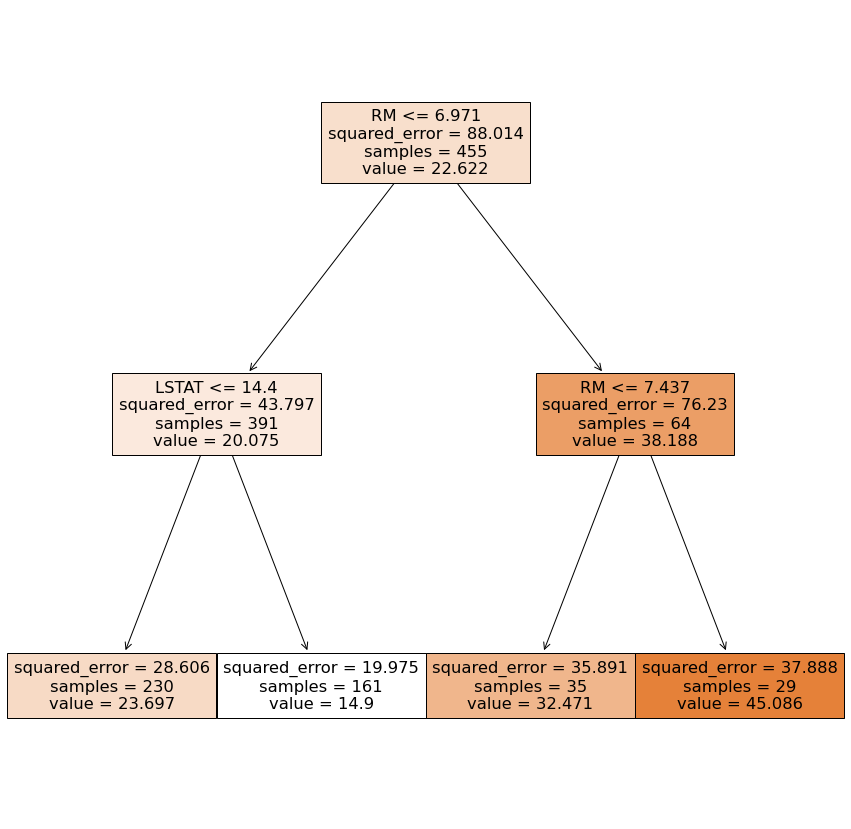

In [8]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(15,15))
# 差在 沒有 class_names 因為這是計算題不是選擇題 
# 多了一個 squared_error => 猜錯機率 誤差愈大 猜錯機率愈大（分佈愈廣，錯愈多， 分佈愈窄，錯愈少）
# MSE Mean squared error：　每點和平均值的距離 == 標準差

plot_tree(reg,
     feature_names=boston["feature_names"],
     filled=True          
          )


In [9]:
# 預測
# 分二層之後，最後那一層會分4個，共有4個平均值，所以下面的預測值只會有4個平均值。
reg.predict(x_test)

array([23.69695652, 23.69695652, 32.47142857, 45.0862069 , 23.69695652,
       32.47142857, 23.69695652, 14.9       , 14.9       , 23.69695652,
       23.69695652, 23.69695652, 32.47142857, 14.9       , 23.69695652,
       14.9       , 23.69695652, 23.69695652, 23.69695652, 23.69695652,
       23.69695652, 23.69695652, 23.69695652, 23.69695652, 14.9       ,
       23.69695652, 23.69695652, 23.69695652, 14.9       , 32.47142857,
       14.9       , 23.69695652, 23.69695652, 23.69695652, 14.9       ,
       14.9       , 23.69695652, 32.47142857, 14.9       , 14.9       ,
       14.9       , 14.9       , 23.69695652, 23.69695652, 23.69695652,
       14.9       , 23.69695652, 23.69695652, 23.69695652, 23.69695652,
       14.9       ])